In [122]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt


In [135]:
def make_model(C, gamma='scale', kernel='rbf', poly_degree=1):
    return make_pipeline(
        StandardScaler(),
        SVC(C=C, gamma=gamma, kernel=kernel, random_state=42, degree=poly_degree)
    )

In [171]:
# Load the dataset
df = pd.read_csv( "smoke_detection_iot.csv" )

# Drop the unnecessary columns
data = df.drop( [ 'Index', 'UTC', 'CNT' ], axis=1 )

# Split the data into features ( X ) and target variable ( Y )
x_features = data.drop( 'Fire Alarm', axis=1 )
y_target = data[ 'Fire Alarm' ]

# Split data into training and testing sets ( 80% training, 20% testing )
x_train, x_test, y_train, y_test = train_test_split( x_features, y_target, test_size=0.8 )

In [172]:
# 1. Create models using linear kernel
#   There is no gamma parameter for the  linear kernel, so we only need to vary C we will use values of C: [0.001 0.01 0.1, 1, 10]
linear_kernel_models = []
for i in range(5):
    linear_kernel_models.append(make_model(kernel='linear', C=10**(i-3)))
    linear_kernel_models[i].fit(x_train, y_train)
    print(i)

0
1
2
3
4


In [173]:
accuracy_scores =  [accuracy_score(y_test, linear_kernel_model.predict(x_test)) for linear_kernel_model in linear_kernel_models]

Text(0.5, 1.0, 'Accuracy vs. C for Linear Kernel')

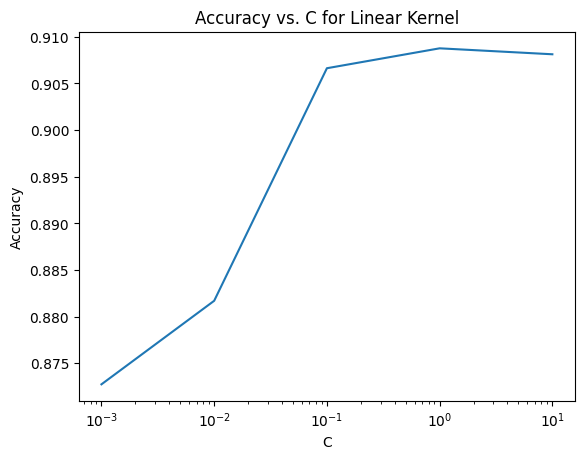

In [174]:
plt.plot([0.001, 0.01, 0.1, 1, 10], accuracy_scores)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C for Linear Kernel')

In [175]:
# 2. Create model with polynomial kernels of varying degrees. Each of these models also needs gamma tuned and C tuned
polynomial_degrees = [2, 3, 4, 5]
poly_gammas = [0.25, 0.5, 1, 2, 4]
poly_Cs = [0.01, 0.1, 1, 10]

In [176]:
polynomial_2_models = [[None]*5]*4
for i in range(4):
    for j in range(5):
        polynomial_2_models[i][j] = make_model(C=poly_Cs[i], gamma=poly_gammas[j], kernel='poly', poly_degree=2).fit(x_train, y_train)

In [177]:
accuracy_scores_poly_2 = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in polynomial_2_models]

Text(0.5, 1.0, 'Accuracy vs Gamma for 2nd Order Polynomial Kernel')

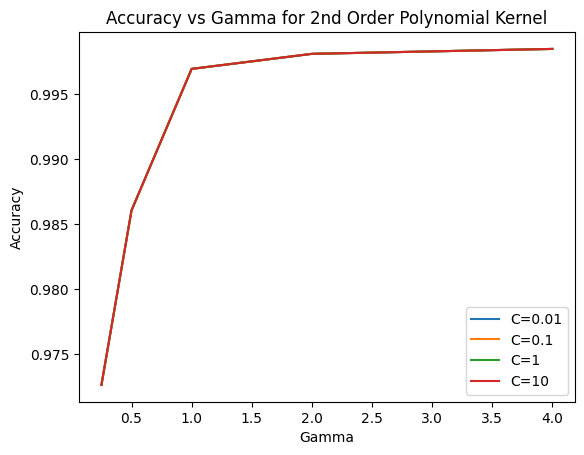

In [178]:
plt.plot(poly_gammas, accuracy_scores_poly_2[0])
plt.plot(poly_gammas, accuracy_scores_poly_2[1])
plt.plot(poly_gammas, accuracy_scores_poly_2[2])
plt.plot(poly_gammas, accuracy_scores_poly_2[3])
plt.legend([f'C={c}' for c in poly_Cs])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for 2nd Order Polynomial Kernel')

In [179]:
polynomial_3_models = [[None]*5]*4
for i in range(4):
    for j in range(5):
        polynomial_3_models[i][j] = make_model(C=poly_Cs[i], gamma=poly_gammas[j], kernel='poly', poly_degree=3).fit(x_train, y_train)
accuracy_scores_poly_3 = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in polynomial_3_models]

In [217]:
poly_3_C_idx = np.argmax(accuracy_scores_poly_3)
print(poly_3_C_idx)
poly_3_gamma_idx = np.argmax(accuracy_scores_poly_3[poly_3_C_idx])
print(poly_Cs[poly_3_C_idx])
print(poly_gammas[poly_3_gamma_idx])
print(accuracy_scores_poly_3[poly_3_C_idx][poly_3_gamma_idx])

4


IndexError: list index out of range

Text(0.5, 1.0, 'Accuracy vs Gamma for 3rd Order Polynomial Kernel')

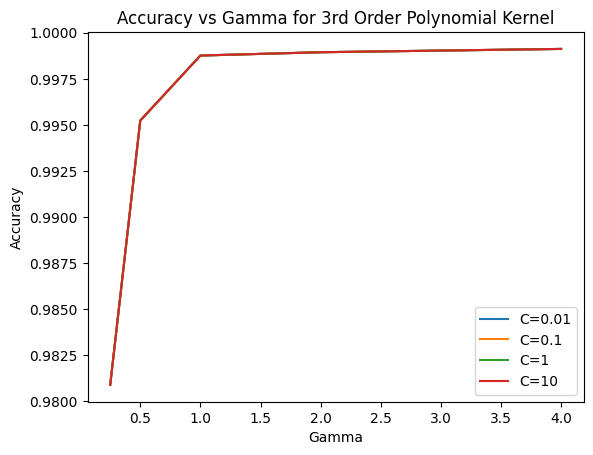

In [180]:
plt.plot(poly_gammas, accuracy_scores_poly_3[0])
plt.plot(poly_gammas, accuracy_scores_poly_3[1])
plt.plot(poly_gammas, accuracy_scores_poly_3[2])
plt.plot(poly_gammas, accuracy_scores_poly_3[3])
plt.legend([f'C={c}' for c in poly_Cs])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for 3rd Order Polynomial Kernel')

In [181]:
polynomial_4_models = [[None]*5]*4
for i in range(4):
    for j in range(5):
        polynomial_4_models[i][j] = make_model(C=poly_Cs[i], gamma=poly_gammas[j], kernel='poly', poly_degree=4).fit(x_train, y_train)
accuracy_scores_poly_4 = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in polynomial_4_models]

In [214]:
poly_4_C_idx = np.argmax(accuracy_scores_poly_4)
poly_4_gamma_idx = np.argmax(accuracy_scores_poly_4[poly_4_C_idx])
print(poly_Cs[poly_4_C_idx])
print(poly_gammas[poly_4_gamma_idx])
print(accuracy_scores_poly_4[poly_4_C_idx][poly_4_gamma_idx])

10
2
0.9985629889829155


Text(0.5, 1.0, 'Accuracy vs Gamma for 4th Order Polynomial Kernel')

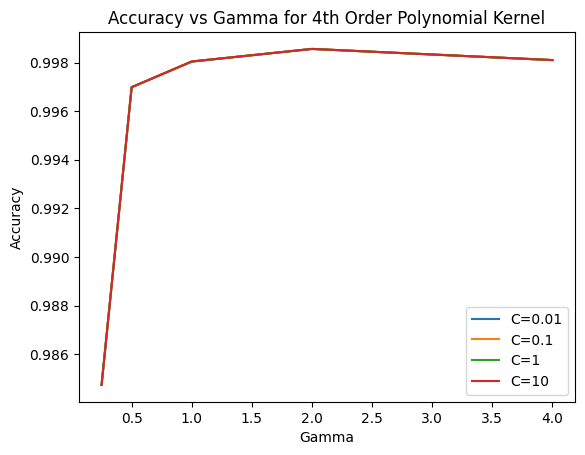

In [182]:
plt.plot(poly_gammas, accuracy_scores_poly_4[0])
plt.plot(poly_gammas, accuracy_scores_poly_4[1])
plt.plot(poly_gammas, accuracy_scores_poly_4[2])
plt.plot(poly_gammas, accuracy_scores_poly_4[3])
plt.legend([f'C={c}' for c in poly_Cs])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for 4th Order Polynomial Kernel')

In [183]:
polynomial_5_models = [[None]*5]*4
for i in range(4):
    for j in range(5):
        polynomial_5_models[i][j] = make_model(C=poly_Cs[i], gamma=poly_gammas[j], kernel='poly', poly_degree=5).fit(x_train, y_train)
accuracy_scores_poly_5 = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in polynomial_5_models]

In [ ]:
poly_5_C_idx = np.argmax(accuracy_scores_poly_5)
poly_5_gamma_idx = np.argmax(accuracy_scores_poly_5[poly_5_C_idx])
print(poly_Cs[poly_5_C_idx])
print(poly_gammas[poly_5_gamma_idx])
print(accuracy_scores_poly_5[poly_5_C_idx][poly_5_gamma_idx])

Text(0.5, 1.0, 'Accuracy vs Gamma for 5th Order Polynomial Kernel')

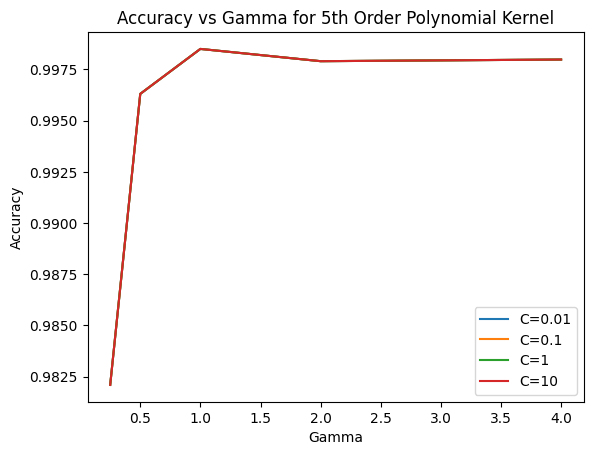

In [184]:
plt.plot(poly_gammas, accuracy_scores_poly_5[0])
plt.plot(poly_gammas, accuracy_scores_poly_5[1])
plt.plot(poly_gammas, accuracy_scores_poly_5[2])
plt.plot(poly_gammas, accuracy_scores_poly_5[3])
plt.legend([f'C={c}' for c in poly_Cs])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for 5th Order Polynomial Kernel')

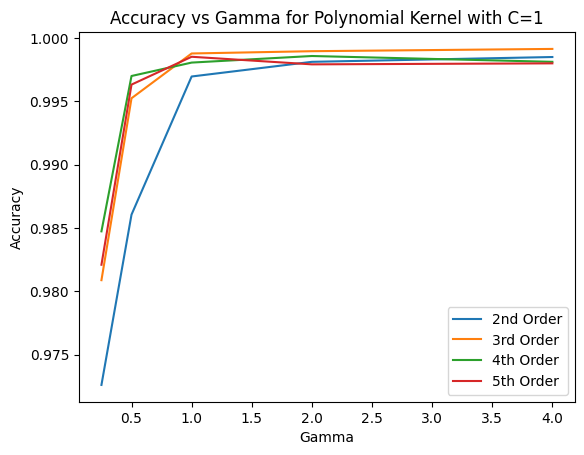

In [218]:
plt.plot(poly_gammas, accuracy_scores_poly_2[2])
plt.plot(poly_gammas, accuracy_scores_poly_3[2])
plt.plot(poly_gammas, accuracy_scores_poly_4[2])
plt.plot(poly_gammas, accuracy_scores_poly_5[2])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma for Polynomial Kernel with C=1')
plt.legend(['2nd Order', '3rd Order', '4th Order', '5th Order'])

In [ ]:
# 3. Using radial basis function kernel. Gamma and C need to be tuned

In [186]:
rbf_gammas = [0.25, 0.5, 1, 2]
rbf_Cs = [0.1, 0.3, 1, 3, 10]

In [200]:
rbf_models = [[None]*len(rbf_gammas)]*len(rbf_Cs)
for i in range(len(rbf_Cs)):
    for j in range(len(rbf_gammas)):
        rbf_models[i][j] = make_model(C=rbf_Cs[i], gamma=rbf_gammas[j], kernel='rbf').fit(x_train, y_train)

In [188]:
rbf_accuracies = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in rbf_models]

In [213]:
rbf_C_idx = np.argmax(rbf_accuracies)
rbf_gamma_idx = np.argmax(rbf_accuracies[rbf_C_idx])
print(rbf_Cs[rbf_C_idx])
print(rbf_gammas[rbf_gamma_idx])
print(rbf_accuracies[rbf_C_idx][rbf_gamma_idx])

1
1
0.9957688008941402


Text(0.5, 1.0, 'Accuracy vs. gamma for RBF Kernel')

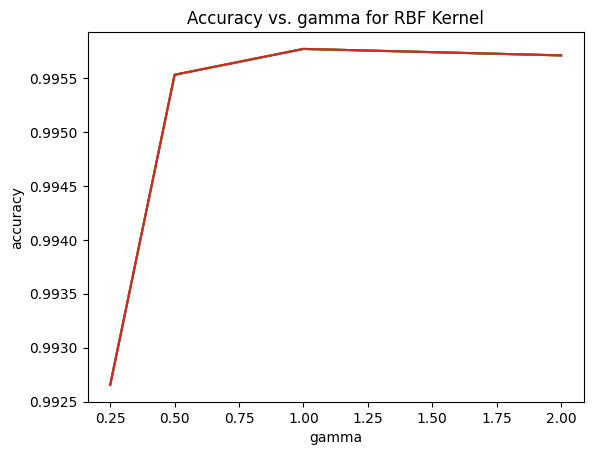

In [220]:
plt.plot(rbf_gammas, rbf_accuracies[0])
plt.plot(rbf_gammas, rbf_accuracies[1])
plt.plot(rbf_gammas, rbf_accuracies[2])
plt.plot(rbf_gammas, rbf_accuracies[3])
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Accuracy vs. gamma for RBF Kernel')

In [ ]:
print("Maximum Test Accuracy for Radial Basis Function Kernel: {}".format(max(rbf_accuracies)))

In [198]:
sigmoid_gammas = [0.25, 0.5, 1, 2]
sigmoid_Cs = [0.1, 0.3, 1, 3, 10]
sigmoid_models = [[None]*len(sigmoid_gammas)]*len(sigmoid_Cs)
for i in range(len(sigmoid_Cs)):
    for j in range(len(sigmoid_gammas)):
        sigmoid_models[i][j] = make_model(C=sigmoid_Cs[i], gamma=sigmoid_gammas[j], kernel='sigmoid').fit(x_train, y_train)

In [199]:
sigmoid_accuracies = [[accuracy_score(y_test, model.predict(x_test)) for model in models] for models in sigmoid_models]

In [212]:
sigmoid_C_idx = np.argmax(sigmoid_accuracies)
sigmoid_gamma_idx = np.argmax(sigmoid_accuracies[sigmoid_C_idx])
print(sigmoid_Cs[sigmoid_C_idx])
print(sigmoid_gammas[sigmoid_gamma_idx])
print(sigmoid_accuracies[sigmoid_C_idx][sigmoid_gamma_idx])

1
1
0.6980081430624302


Text(0.5, 1.0, 'Accuracy vs Gamma for Sigmoid Kernel')

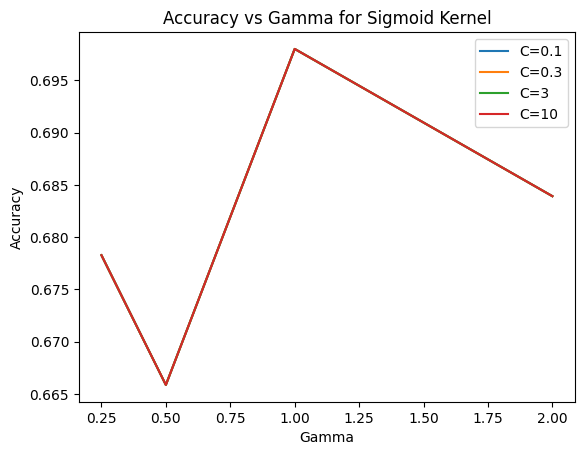

In [221]:
plt.plot(sigmoid_gammas, sigmoid_accuracies[0])
plt.plot(sigmoid_gammas, sigmoid_accuracies[1])
plt.plot(sigmoid_gammas, sigmoid_accuracies[2])
plt.plot(sigmoid_gammas, sigmoid_accuracies[3])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend(['C=0.1', 'C=0.3', 'C=3', 'C=10'])
plt.title('Accuracy vs Gamma for Sigmoid Kernel')